In [58]:
%matplotlib inline

In [59]:
import pandas as pd

In [60]:
from PyCMLib import *

In [61]:
sensor_regexes = ['MODIS',
                  'Landsat',
                  'MERIS',
                  'IKONOS',
                  'Quickbird',
                  'Sentinel']

In [62]:
results = process_all_articles('mdpi-rs/**', pf_count_regex, regexes=sensor_regexes)

In [63]:
def f(x):
    if len(x) == 2:
        return x[1]
    else:
        return x

In [64]:
cols = [f(r) for r in sensor_regexes]

In [65]:
r = results[cols]

In [66]:
bool_res = results.copy()

In [67]:
bool_res[cols] = (r > 0)

In [68]:
bool_res.index = pd.DatetimeIndex(bool_res.date)

In [69]:
yearly = bool_res.resample('A', how='sum')

In [70]:
bool_res.resample('A', how='count').title

2009-12-31     82
2010-12-31    132
2011-12-31    137
2012-12-31    189
2013-12-31    338
2014-12-31    589
2015-12-31    772
Freq: A-DEC, Name: title, dtype: int64

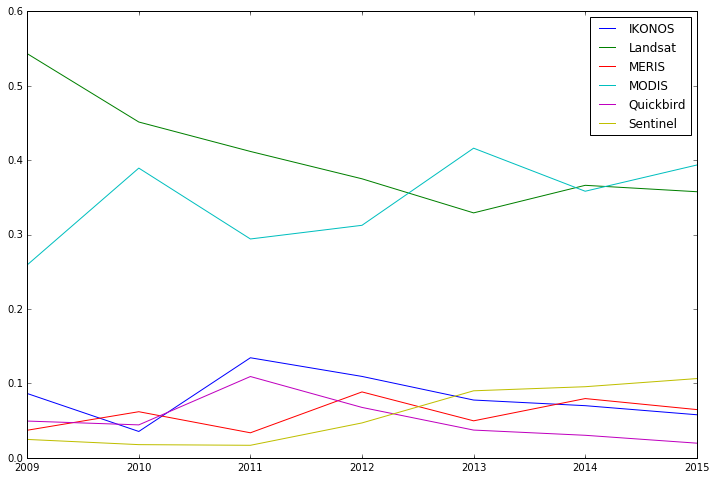

In [71]:
yearly.div(yearly.sum(axis=1), axis='index').plot(figsize=(12,8))

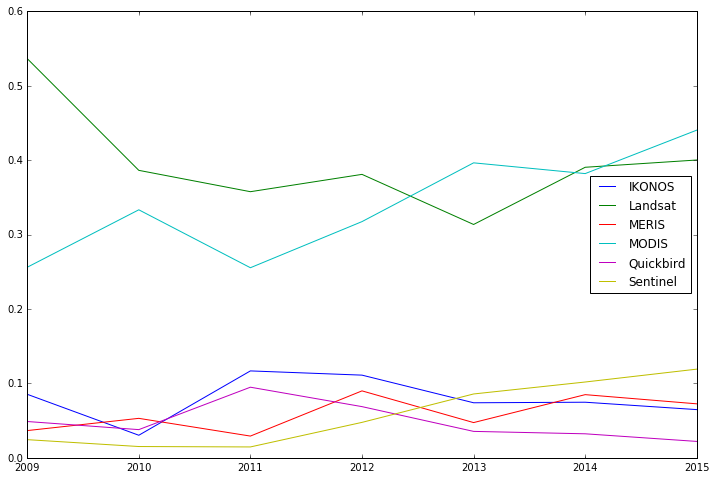

In [72]:
yearly.div(bool_res.resample('A', how='count').title, axis='index').plot(figsize=(12,8))